# Задание

Анализ изображений классическими методами компьютерного зрения:

1) 
2) 
3) По изображению `./images/src_ball.jpg` получить “вид сверху”, найти шары и кий, оценить направление удара и траекторию прицельного шара после удара.

# Настройки/Импорты

In [1]:
import cv2 # для работы с изображениями
import numpy as np # для работы с массивами
from matplotlib import pyplot as plt # для построения графиков/вывода изображений

# Вспомогательные функции

In [2]:
def show_image(image, figsize: tuple, gray: bool=False) -> None:
    """
    Функция для вывода изображений.\n
    Parameters:
        * image: изображение, что нужно вывести
        * figsize: размер выводимой картинки
        * gray: флаг, является ли изображение одноканальным (чёрно-белым)\n
    Returns:
        * None
    """
    cmap = "gray" if gray else "viridis" # выбор цветовой схемы, (стандартная — "viridis", но если передан ключ gray — "gray")

    plt.figure(figsize=figsize) # размер фигуры
    plt.imshow(image, cmap) # вывод изображения
    plt.show() # показ фигуры

# 1)

# 2)

# 3) По изображению `src_ball.jpg` получить “вид сверху”, найти шары и кий, оценить направление удара и траекторию прицельного шара после удара.  

## Загрузка изображения

In [3]:
img_bgr = cv2.imread('./images/src_balls.jpg') # загружаем изображение
img_bgr.shape # размерность изображения (height, width, colors)

(4032, 3024, 3)

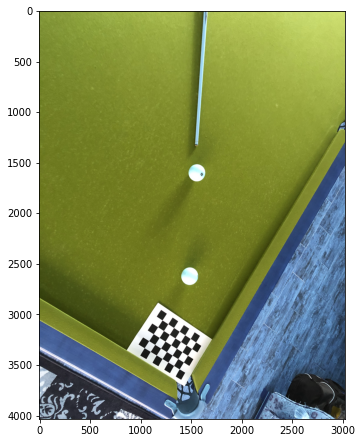

In [4]:
show_image(image=img_bgr, figsize=(10, 7.5)) # выводим изображение

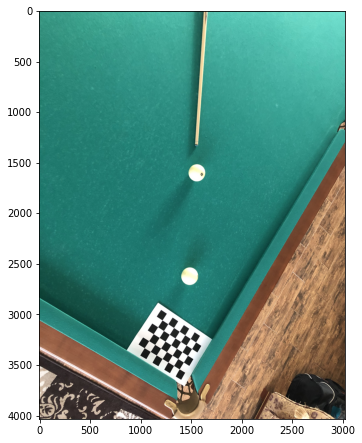

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # конвертируем в другую цветовую схему (изначально картинка в формате BGR)
show_image(image=img_rgb, figsize=(10, 7.5)) # выводим изображение

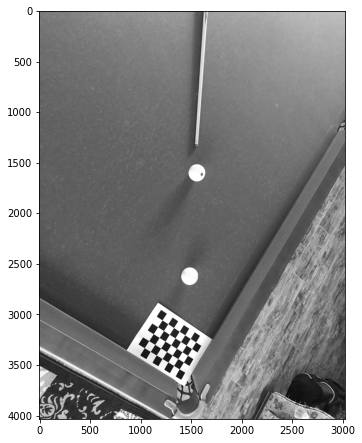

In [6]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) # конвертируем в другую цветовую схему (изначально картинка в формате BGR)
show_image(image=img_gray, figsize=(10, 7.5), gray=True) # выводим изображение

## Нахождение шахматной сетки

In [7]:
ret, corners = cv2.findChessboardCorners(image=img_rgb, patternSize=(7,5), corners=None) # ищем углы шахматной доски (на чёрно-белом изображении)
# image — 8-bit grayscale или цветное изображение
# patternSize — количество внутренних углов у шахматной доски (за строку, за столбец) ~ (число строк доски -1, число столбцов доски -1)
# corners — выходной массив для обнаруженных углов (None, чтобы вернуть их как результат выполнения функции)

In [8]:
# вывод результата работы функции "findChessboardCorners" (найдена ли доска, координат внутренних углов у доски)
print(f"Найдена ли шахматная доска: {ret}.")
corners # np.array внутренних углов (координаты углов: сначала идёт ширина, а потом высота; однако у рассматриваемого изображения сначала идёт высота, а потом ширина (важно не ошибиться!))

Найдена ли шахматная доска: True.


array([[[1219.4376, 3056.5808]],

       [[1277.0518, 3094.7585]],

       [[1333.8605, 3132.0178]],

       [[1390.2826, 3169.0957]],

       [[1444.555 , 3205.57  ]],

       [[1499.2079, 3239.8086]],

       [[1552.0151, 3275.3193]],

       [[1175.9465, 3125.195 ]],

       [[1234.6776, 3162.3206]],

       [[1291.4543, 3199.15  ]],

       [[1348.2926, 3235.7307]],

       [[1402.5997, 3270.6343]],

       [[1457.9357, 3306.1316]],

       [[1511.2125, 3340.624 ]],

       [[1131.752 , 3192.421 ]],

       [[1190.5787, 3230.497 ]],

       [[1249.0702, 3266.6582]],

       [[1305.579 , 3302.8232]],

       [[1362.2975, 3337.4644]],

       [[1417.0515, 3372.0532]],

       [[1472.4702, 3407.2898]],

       [[1088.1343, 3262.1582]],

       [[1148.1918, 3299.1729]],

       [[1206.2155, 3335.018 ]],

       [[1263.6313, 3370.5698]],

       [[1320.0679, 3404.9834]],

       [[1376.1384, 3439.2349]],

       [[1430.6465, 3473.2466]],

       [[1043.0817, 3331.5747]],

       [[1103.

In [9]:
img_rgb_corners = img_rgb.copy() # делаем копию, чтобы не испортить оригинал
img_rgb_corners = cv2.drawChessboardCorners(image=img_rgb_corners, patternSize=(7, 5), corners=corners, patternWasFound=ret) # добавляем сетку найденной шахматной доски на изображение
# image — изображение, на которое нужно добавить сетку шахматной доски (ОНО ПЕРЕЗАПИШЕТСЯ ВСЁ РАВНО!)
# patternSize — количество внутренних углов у шахматной доски (за строку, за столбец) ~ (число строк доски -1, число столбцов доски -1)
# corners — найденные внутренние углы
# patternWasFound — флаг, что углы уже найдены и переданы в corners

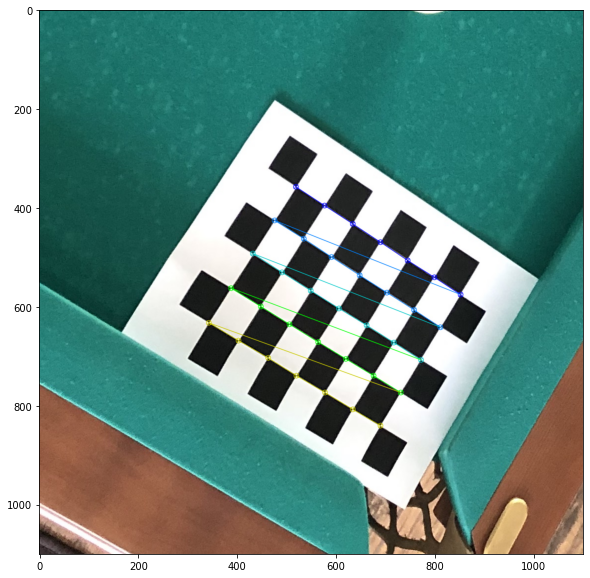

In [10]:
show_image(image=img_rgb_corners[2700:3800, 700:1800,], figsize=(10, 10)) # выводим изображение
# [2700:3800, 700:1800,] — срез пикселей (для приближения) по высоте от 2700 до 3800, по ширине от 700 до 1800, все 3 канала оставляем

## Получение "[вида сверху](https://digiratory.ru/1674)"

**Модель камеры:**

Матрицы ***P*** — проекционная матрица размерности *3x4*. Необходима для получения координат изображения в 2D из 3D проекции.

$$
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix} 
= \mathbf{P} * \begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix} 
= \begin{bmatrix} p_{11} & p_{12} & p_{13} & p_{14} \\ p_{21} & p_{22} & p_{23} & p_{24} \\ p_{31} & p_{32} & p_{33} & p_{34} \end{bmatrix} * \begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix} 
$$

Она имеет 11 степеней свободы, то есть $p_{34}$ = 1

Или более точная запись:

$$
s * \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} 
= \begin{bmatrix} f_x & 0 & c_x \\ 0 & f_y & c_y \\ 0 & 0 & 1 \end{bmatrix} * \begin{bmatrix} r_{11} & r_{12} & r_{13} & t_1 \\ r_{21} & r_{22} & r_{23} & t_2 \\ r_{31} & r_{32} & r_{33} & t_3 \end{bmatrix} * \begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix} 
$$

где 
$$
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix} \text{— 2D Image coordinates} 
\\
\begin{bmatrix} f_x & 0 & c_x \\ 0 & f_y & c_y \\ 0 & 0 & 1 \end{bmatrix} \text{— Intrinsic properties (Optical centre, scaling)} 
\\
\begin{bmatrix} r_{11} & r_{12} & r_{13} & t_1 \\ r_{21} & r_{22} & r_{23} & t_2 \\ r_{31} & r_{32} & r_{33} & t_3 \end{bmatrix} \text{— Extrinsic properties (Camera rotation, Translation)} 
\\
\begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix} \text{— 3D World coordinates} 
$$

Откуда координаты изображения (пикселей) в 2D вычисляются следующим образом:
$$
x= \frac{p_{11}X + p_{12}Y + p_{13}Z + p_{14}}{p_{31}X + p_{32}Y + p_{33}Z + p_{34}}
\\
y= \frac{p_{21}X + p_{22}Y + p_{23}Z + p_{24}}{p_{31}X + p_{32}Y + p_{33}Z + p_{34}}
$$

**Гомография:**

Работа с планарными (плоскими) объектами — часто возникающая задача в компьютерном зрении. 

Преобразования для планарных объектов называются **гомографией**. 

Два изображения одного и того же плоского объекта связаны **гомографией** — это преобразование ***H*** (матрица ***P*** в случае плоских изображений), отображающее точки одного изображения в точки другого изображения (***H*** трансформирует плоскость в плоскость).

$$
s * \begin{bmatrix} x^′ \\ y^′ \\ 1 \end{bmatrix} 
= \mathbf{H} * \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} 
= \begin{bmatrix} h_{11} & h_{12} & h_{13} \\ h_{21} & h_{22} & h_{23} \\ h_{31} & h_{32} & h_{33} \end{bmatrix} * \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

К примеру есть плоский объект, расположенный в одной плоскости, который имеет точки *q1, q2, q3, q4*. Мы снимаем объект в одном положении с фиксированной камерой, после чего снимаем этот же объект в другом положении с той же камеры. Точка *q1* представляет одну и ту же точку на двух разных изображениях, также как и точки *q2, q3 и q4*. В компьютерном зрении такие точки называются **соответствующими точками**.

Координаты точек на первом и втором изображении будут связаны преобразованием *гомографии*:
$$
x^′= \frac{h_{11}x + h_{12}y + h_{13}}{h_{31}x + h_{32}y + h_{33}}
\\
y^′= \frac{h_{21}x + h_{22}y + h_{23}}{h_{31}x + h_{32}y + h_{33}}
$$

Выведем это преобразование:

Рассмотрим проекцию на первом изображении и проекцию на втором изображении. Во втором случае у нас другая проекционная матрица, потому что поза другая, соответственно точка тоже будет другая. Мы хотим ***найти преобразование между пикселями на изображении***. Идея получения этого преобразования состоит в следующем: ***так как объект плоский, то мы можем выбрать такую систему координат, в которой начало координат расположено где-то на этой плоскости***, ось ***Z*** будет направлена по нормали к этой плоскости (оси ***X***, ***Y*** будут направлены как-то на плоскости). ***В этой системе координат будут новые проекционные матрицы, которые всегда можно пересчитать***.

Главное, что координаты нашего объекта теперь вместо ***(X,Y,Z,1)*** будут ***(X,Y,0,1)***. При умножении такого вектора ***(X,Y,0,1)*** на проекционную матрицу размерности *3×4*, то третий столбец будет все время умножаться на ноль. Поэтому на плоскости в качестве проекционной матрицы мы можем использовать матрицу ***P*** без третьего столбца и умножать ее на вектор ***(X,Y,1)***. Если домножим ещё на обратную матрицу ***s***, то получим (*X*~*x*, *Y*~*y* при переходе от трёхмерного в двумерное пространство):

$$
s * \begin{bmatrix} x^′ \\ y^′ \\ 1 \end{bmatrix} 
= \begin{bmatrix} h_{11} & h_{12} & h_{13} \\ h_{21} & h_{22} & h_{23} \\ h_{31} & h_{32} & h_{33} \end{bmatrix} * \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
= s* \begin{bmatrix} p_{11} & p_{12} & — & p_{14} \\ p_{21} & p_{22} & — & p_{24} \\ p_{31} & p_{32} & — & p_{34} \end{bmatrix} * \begin{bmatrix} X \\ Y \\ — \\ 1 \end{bmatrix} 
$$

Таким образом, если мы знаем координаты первого изображения на плоскости, то существует такая матрица размером *3×3*, с помощью которой можно найти координаты на втором изображении, используя формулу приведенную выше. Результатом такого преобразования получается вектор в однородных координатах. Для перехода от однородных координат к мировым нужно результирующий вектор поделить на **s**.

**Из этого следует, что для получения "вида сверху" достаточно взять 4 точки из найденной шахматной доски, например — самые угловые. Затем вручную задать (так как нет других изображений) их поворот, чтобы они выровнялись (не были наклонены). По подсчитанным вручную положениям углов шахматной доски (выравнена поворотом) посчитать гомогенную матрицу, что необходима для поворота изначального изображения.**

In [72]:
corners_supporting = np.array([corners[i][0] for i in [0, 6, 28, 34]]) # оставляем 4 опорных угла (точки) в виде np.array (shape = (4,2) вместо (4,1,2))
# их номера 0, 6, 28, 34, так как всего углов 35 (нумеруются с 0) и они идут вдоль какой-нибудь стороны (вдоль столбцов по строкам)

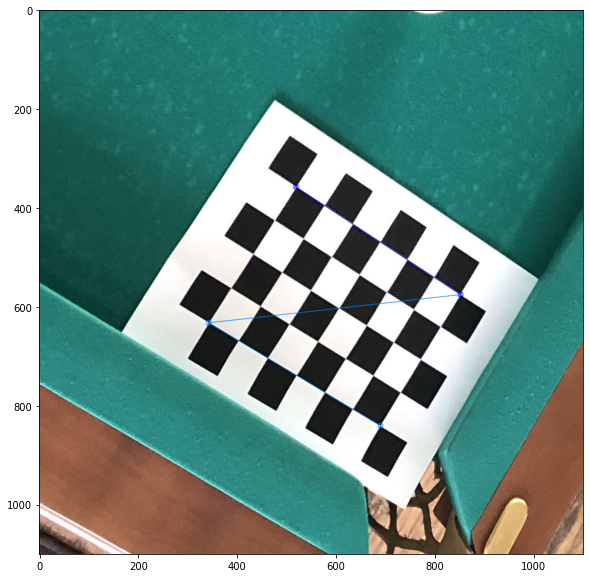

In [73]:
img_rgb_corners__supporting = img_rgb.copy() # делаем копию, чтобы не испортить оригинал
img_rgb_corners__supporting = cv2.drawChessboardCorners(image=img_rgb_corners__supporting, patternSize=(2, 2), corners=corners_supporting, patternWasFound=ret) # добавляем сетку найденной шахматной доски на изображение
# изменили patternSize на (2, 2), так как точек теперь 4

show_image(image=img_rgb_corners__supporting[2700:3800, 700:1800,], figsize=(10, 10)) # выводим изображение
# [2700:3800, 700:1800,] — срез пикселей (для приближения) по высоте от 2700 до 3800, по ширине от 700 до 1800, все 3 канала оставляем

Считаем расстояние между точками, чтобы узнать размер шахматной доски в писелях.

In [75]:
corners_supporting # координаты углов: сначала идёт ширина, а потом высота; однако у рассматриваемого изображения сначала идёт высота, а потом ширина (важно не ошибиться!)

array([[1219.4376, 3056.5808],
       [1552.0151, 3275.3193],
       [1043.0817, 3331.5747],
       [1389.6381, 3540.387 ]], dtype=float32)

In [76]:
chess_height = cv2.norm(corners_supporting[0], corners_supporting[1]) # считаем норму (расстояние между точками) как высоту шахматной доски (точки 0 и 1)
chess_width = cv2.norm(corners_supporting[0], corners_supporting[2]) # считаем норму (расстояние между точками) как ширину шахматной доски (точка 0 и 2)

Задаём новую позицию для шахматной доски на изображении (пусть она будет в левом нижнем углу).

In [98]:
pad = 20 # размер отступа от края картинки (произвольный)
original_img_height = img_rgb.shape[0] # изначальная высота изображения (нужно так как ось OX идёт снизу вверх)

corners_new = np.array([[chess_width+pad, original_img_height - (chess_height+pad)], [chess_width+pad, original_img_height-pad], [pad, original_img_height - (chess_height+pad)], [pad, original_img_height-pad]], dtype=np.float32) # новое положение углов шахматной доски
corners_new # координаты новых углов: сначала идёт ширина, а потом высота; однако у рассматриваемого изображения сначала идёт высота, а потом ширина (важно не ошибиться!)

array([[ 346.68497, 3613.9368 ],
       [ 346.68497, 4012.     ],
       [  20.     , 3613.9368 ],
       [  20.     , 4012.     ]], dtype=float32)

Трансформируем начальное изображение (получаем "вид сверху").

In [99]:
H = cv2.getPerspectiveTransform(corners_supporting, corners_new) # считаем матрицу гомографии
H

array([[ 4.18989491e-01, -6.99263294e-01,  1.90919680e+03],
       [ 2.69628024e-01,  3.54370472e-01,  1.53575081e+03],
       [-1.06244702e-04, -1.79256696e-05,  1.00000000e+00]])

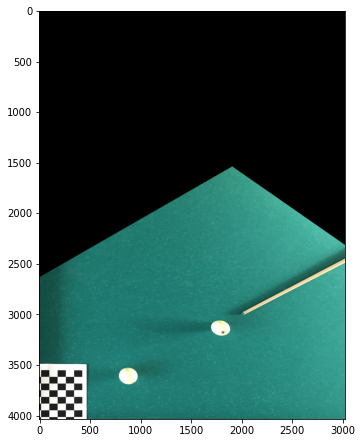

In [100]:
img_rgb_rotated = cv2.warpPerspective(img_rgb, H, dsize=(img_rgb.shape[1], img_rgb.shape[0])) # поворачиваем изначальное изображение с помощью гомографии
show_image(image=img_rgb_rotated, figsize=(10, 7.5)) # выводим изображение

### Поиск шаров и кия

### Оценка направление удара и траектории прицельного шара после удара